# Case 0 - Learning Basics
Eric Keränen<br>
Last edited: 12.1.2022<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# Setup

In [81]:
# Required libraries
%pylab inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense

%config IPCompleter.greedy=True

print(f'Tensorflow version {tf.__version__}')

Populating the interactive namespace from numpy and matplotlib
Tensorflow version 2.7.0


More info on [IPCompleter](https://stackoverflow.com/questions/64263620/what-is-the-purpose-of-config-ipcompleter-greedy-true)

# Background

The aim of this Notebook is to find the simplest neural network model than can learn in the least number of epochs to classify the black and white handwritten digits at an accuracy rate of 0.970.

# Data

The data was retrieved from keras datasets. The dataset consists of grayscale images of 10 digits with the digits being 0,1,2,3,4,5,6,7,8 and 9. The dataset can be found from [keras](https://keras.io/api/datasets/mnist/) website or the [original creators](http://yann.lecun.com/exdb/mnist/).</br>

Dataset has a training set of 60 000 images and test set of 10 000 images.

In [82]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_data = train_images.reshape((60000,28*28))
train_data = train_data.astype('float32')
train_data /= 255

test_data = test_images.reshape((10000,28*28))
test_data = test_data.astype('float32')
test_data /= 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Model and training

The following model was used:

In [105]:
network = tf.keras.models.Sequential()

# Hidden Layer
network.add(Dense(166, activation = 'relu',input_shape=(28*28,)))

# Output Layer
network.add(Dense(10, activation = 'softmax'))

network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = network.fit(train_data, train_labels, epochs = 3, batch_size = 128)
history

Epoch 1/3
469/469 [==============================] - 1s 1ms/step - loss: 0.3106 - accuracy: 0.9151
Epoch 2/3
469/469 [==============================] - 1s 1ms/step - loss: 0.1429 - accuracy: 0.9587
Epoch 3/3
469/469 [==============================] - 1s 1ms/step - loss: 0.1008 - accuracy: 0.9708


I found out that the model can also work with a lower amount of neurons and a higher amount of epochs. There is no one answer and the "balance" between these two values determine quite much of the accuracy. I believe the one hidden layer is enough for this model.

# Results and Discussion

The simplest neural network that I found, which can learn in the least number of epochs to classify the black and white handwritten digits with an accuracy of at least 0.970, is a neural network consisting of <strong>one hidden layer</strong>, <strong>166 neurons</strong> and <strong>three epochs</strong>.</br>

These results may vary a little bit since sometimes you can get above 0.970. You can see this variance when you run the exact same code multiple times, the accuracy changes.

In [108]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose = 0)

print (f'Test loss: {test_loss:.4f}')
print (f'Test accuracy: {test_acc:.4f}')

Test loss: 0.0910
Test accuracy: 0.9735


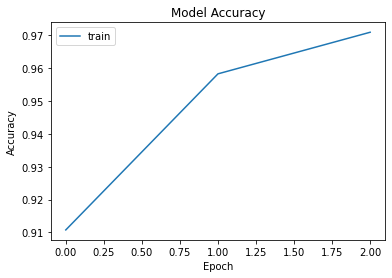

In [70]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Conclusions

To summarize I found out that to achieve an accuracy of 0.970 in the current dataset requires one hidden layer, 166 neurons and three epochs at minimum according to my tests. The results may vary since running the same code multiple times amount to different accuracies. I believe the accuracy is mainly determined by epochs and neurons. Hidden layers, batch sizes and activation also affect the accuracy, but the exercise mainly focused on hidden layers, neurons and epochs.